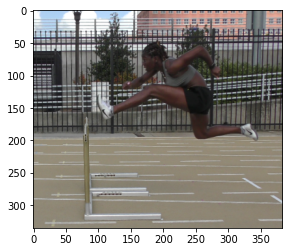

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from PIL import Image
import mediapipe as mp


image_path = "./sample_images/jump3.png"
img = cv2.imread(image_path)[:,:,::-1]
# cv2.imshow(img)
plt.imshow(img)

Nose coordinates: (171.02951431274414, 84.5266380906105)
Pose landmarks:


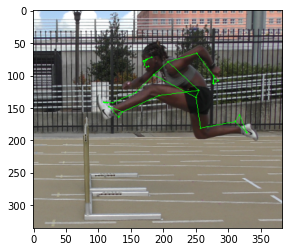

In [14]:

mp_pose = mp.solutions.pose

# Initialize MediaPipe Pose.
pose = mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5)

# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# Print nose landmark.
image_hight, image_width, _ = img.shape

print(
    f'Nose coordinates: ('
    f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
    f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
)

# Draw pose landmarks.
print(f'Pose landmarks:')
annotated_image = img.copy()
mp_drawing.draw_landmarks(
  image=annotated_image,
  landmark_list=results.pose_landmarks,
  connections=mp_pose.POSE_CONNECTIONS,
  landmark_drawing_spec=drawing_spec,
  connection_drawing_spec=drawing_spec)
#cv2_imshow(annotated_image)
plt.imshow(annotated_image)

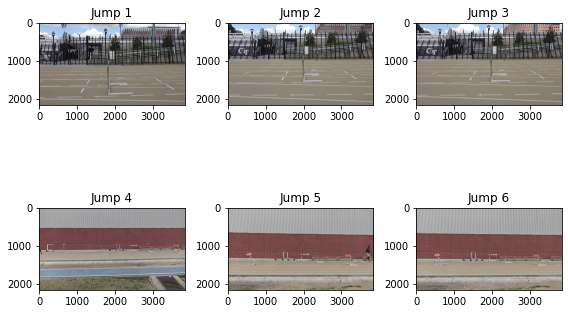

In [54]:
video_base_path = './sample_videos/jump' #_.mp4
image_base_path = './sample_videos/screenshot_jump' #_.jpg
axes=[]

#total_frames = int(f.get(cv2.CAP_PROP_FRAME_COUNT))

fig=plt.figure(figsize=(8, 8))

for i in range(1,7):
    video_path = video_base_path+str(i)+".mp4"
    image_path = image_base_path+str(i)+".jpg"
    
    f = cv2.VideoCapture(video_path)
    
    #get 30th frame for safety
    for j in range(30):
        rval, frame = f.read()

    cv2.imwrite(image_path, frame)
    f.release()

    #img = cv2.imread(image_path)[:,:,::-1]
    axes.append( fig.add_subplot(3, 3, i) )
    subplot_title=("Jump "+str(i))
    axes[-1].set_title(subplot_title) 
    img = np.array(Image.open(image_path), dtype=np.uint8)
    plt.imshow(img)
    

fig.tight_layout() 
plt.show()

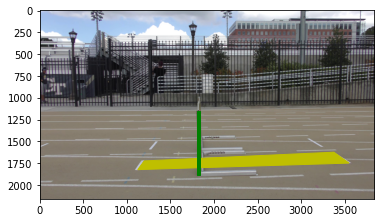

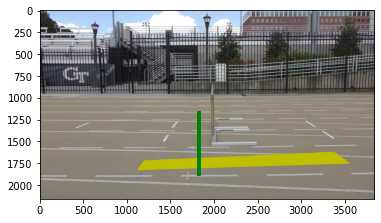

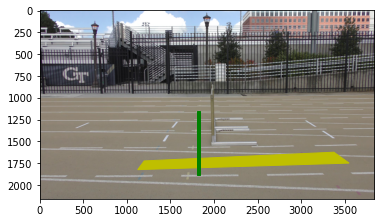

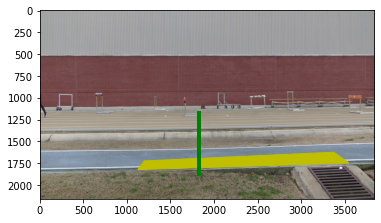

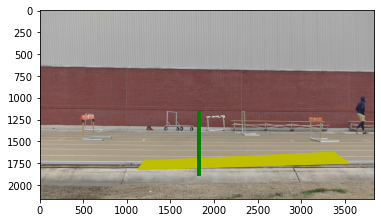

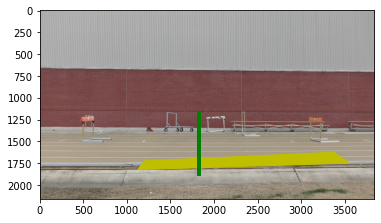

In [99]:
data=[[1800,1150,40,740],
     [1800,1150,40,740],
     [1800,1150,40,740],
     [1800,1150,40,740],
     [1800,1150,40,740],
     [1800,1150,40,740]
    ]


for i in range(0,6):
    image_path = image_base_path+str(i+1)+".jpg"

    im = np.array(Image.open(image_path), dtype=np.uint8)

    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)

    # Create a Rectangle patch
    x = [1800,1840,1840,1800]
    y = [1890,1890,1150,1150]
    #rect = patches.Rectangle((data[i][0],data[i][1]),data[i][2],data[i][3],linewidth=1,edgecolor='g',facecolor='g')
    hurdle = patches.Polygon(xy=list(zip(x,y)), linewidth=1,edgecolor='g',facecolor='g')
    
    x = [1125,3550,3375,1200]
    y = [1825,1750,1625,1725]
    floor = patches.Polygon(xy=list(zip(x,y)), linewidth=1,edgecolor='y',facecolor='y')

    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.add_patch(rect)

    plt.show()